In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.ar_model import AR, ARResults
import statsmodels.tsa.arima_model as ar

In [2]:
num_samples = 1000
num_bins = 20
white_noise = np.random.random(size=num_samples)

In [3]:
a = 2
b1 = 0.3
b2 = -0.12
b3 = 0.48
b4 = -0.85
b5 = 0.74

AR1 = np.zeros(num_samples)
AR2 = np.zeros(num_samples)
AR3 = np.zeros(num_samples)
AR4 = np.zeros(num_samples)
AR5 = np.zeros(num_samples)

for i in range(1, num_samples):
    AR1[i] = a + b1*AR1[i-1] + white_noise[i]
    AR2[i] = a + b1*AR2[i-1] + b2*AR2[i-2] + white_noise[i]
    AR3[i] = a + b1*AR3[i-1] + b2*AR3[i-2] + b3*AR3[i-3] + white_noise[i]
    AR4[i] = a + b1*AR4[i-1] + b2*AR4[i-2] + b3*AR4[i-3] + b4*AR4[i-4] + white_noise[i]
    AR5[i] = a + b1*AR5[i-1] + b2*AR5[i-2] + b3*AR5[i-3] + b4*AR5[i-4] + b5*AR5[i-5] + white_noise[i]

In [4]:
plot_pacf(AR1, title='AR(1)');
plot_pacf(AR2, title='AR(2)');
plot_pacf(AR3, title='AR(3)');
plot_pacf(AR4, title='AR(4)');
plot_pacf(AR5, title='AR(5)');

C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


In [5]:
for i in range(5):
    model = AR(AR1)
    ARfit = model.fit(maxlag=i+1, method='mle')
    print(f'===========================\nAR' + str(i+1))
    print(f'Lag: {ARfit.k_ar}')
    print(f'Coefficients: \n{ARfit.params}')
    
print(f'True components')
print(f'a: {a}, b1: {b1}, b2: {b2}, b3: {b3}, b4: {b4}, b5: {b5}')

AR1
Lag: 1
Coefficients: 
[2.39852772 0.32701551]
AR2
Lag: 2
Coefficients: 
[ 2.45243884  0.33335809 -0.0214399 ]
AR3
Lag: 3
Coefficients: 
[ 2.4274494   0.33341575 -0.02441709  0.00991818]
AR4
Lag: 4
Coefficients: 
[ 2.48960962  0.33350302 -0.02463246  0.01735279 -0.02471392]
AR5
Lag: 5
Coefficients: 
[ 2.47217373  0.33363825 -0.02470289  0.01741836 -0.02676124  0.00679983]
True components
a: 2, b1: 0.3, b2: -0.12, b3: 0.48, b4: -0.85, b5: 0.74


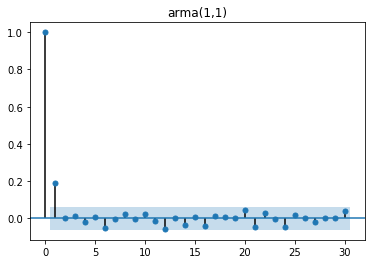

In [11]:
arma11 = np.zeros(num_samples)
for i in range(1, num_samples):
    arma11[i] = a + white_noise[i] + b1*arma11[i-1] + b2*white_noise[i-1]
    
plot_pacf(arma11, title='arma(1,1)');

In [14]:
model_ret_ar_1_ma_1 = ar.ARMA(arma11, order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 1)   Log Likelihood                -223.122
Method:                       css-mle   S.D. of innovations              0.302
Date:                Fri, 15 May 2020   AIC                            454.244
Time:                        10:48:33   BIC                            473.875
Sample:                             0   HQIC                           461.705
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4792      0.012    283.397      0.000       3.455       3.503
ar.L1.y        0.2447      0.163      1.503      0.133      -0.074       0.564
ma.L1.y       -0.0305      0.167     -0.183      0.855      -0.358       0.297
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.0863           +0.0000j            4.0863            0.0000
MA.1           32.7586           +0.0000j           32.7586            0.0000
-----------------------------------------------------------------------------
"""